In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001051741"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001051741
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRST NIAGARA FINANCIAL GROUP INC
Ticker,FNFG


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,6.0,1.341333e+01,2.244697e-01,1.298000e+01,1.342750e+01,1.346500e+01,1.351000e+01,1.363000e+01
interest income,21.0,1.324855e+08,5.544422e+07,4.770900e+07,1.058190e+08,1.099870e+08,1.453570e+08,2.773700e+08
net income,21.0,1.101981e+07,5.491789e+07,-2.225030e+08,1.661100e+07,2.080000e+07,2.783700e+07,4.585500e+07
net interest income,21.0,9.410095e+07,5.392144e+07,2.659400e+07,5.706600e+07,7.170600e+07,1.141690e+08,2.304370e+08
provision for loan losses,21.0,9.599429e+06,7.065721e+06,1.600000e+06,3.100000e+06,8.900000e+06,1.313100e+07,3.200000e+07


# Plots

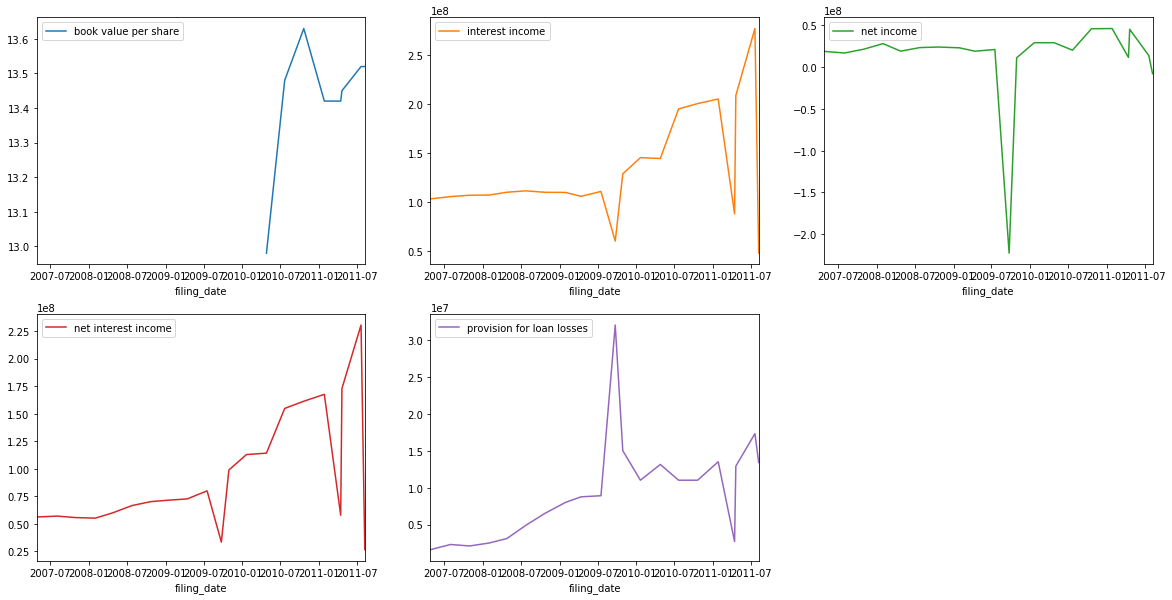

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001051741 book value per share       2007Q1 to 2009Q4: 12 periods    missing   
           interest income                                  2009Q2  duplicate   
           interest income                                  2010Q1  duplicate   
           interest income                                  2010Q4  duplicate   
           net income                                       2009Q2  duplicate   
           net income                                       2010Q1  duplicate   
           net income                                       2010Q4  duplicate   
           net interest income                              2009Q2  duplicate   
           net interest income                              2010Q1  duplicate   
           net interest income                              2010Q4  duplicate   
           provision for loan losses                        2009Q2  duplicate   
           provision for loan losses                        2010Q4  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001051741 book value per share           Missing period  
           interest income              Duplicate period  
           interest income              Duplicate period  
           interest income              Duplicate period  
           net income                   Duplicate period  
           net income                   Duplicate period  
           net income                   Duplicate period  
           net interest income          Duplicate period  
           net interest income          Duplicate period  
           net interest income          Duplicate period  
           provision for loan losses    Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()